In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
from matplotlib.pyplot import figure
import arviz as az
import pymc3 as pm
import pandas as pd

%matplotlib inline

Carregando o dataset iris

In [2]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<AxesSubplot:xlabel='species', ylabel='sepal_length'>

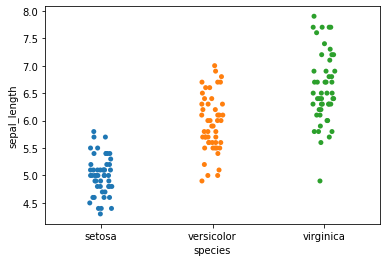

In [3]:
sns.stripplot(x="species", y="sepal_length", data=iris,jitter=True)

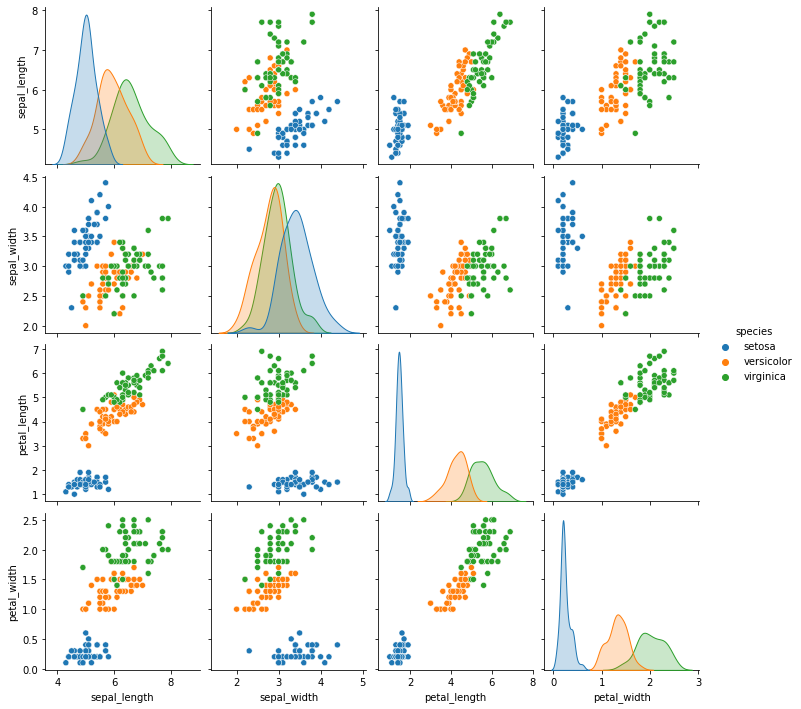

In [4]:
sns.pairplot(iris, hue='species', diag_kind='kde')

## Aplicando Logistic


In [5]:
df = iris[(iris['species'] == 'versicolor') | (iris['species'] == 'setosa')]
y_1 = pd.Categorical(df['species']).codes
#x_n = ['sepal_length', 'sepal_width']
x_n = ['petal_length', 'petal_width']
x_1 = df[x_n].values

lso pay attention to the two deterministic variables; theta and bd. theta is the result of applying the logistic function to the variable mu and bd is the boundary decision, the value used to separate between classes; we will discuss it later in detail. Another point worth mentioning is that instead of explicitly writing the logistic function as follows, we could have called the Theano function sigmoid. This function is aliased in PyMC3 as pm.math.sigmoid.

<ipython-input-9-b44d2909536b>:9: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace_1 = pm.sample(50000)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta, alpha]


Sampling 4 chains for 1_000 tune and 50_000 draw iterations (4_000 + 200_000 draws total) took 94 seconds.
There were 4705 divergences after tuning. Increase `target_accept` or reparameterize.
There were 5416 divergences after tuning. Increase `target_accept` or reparameterize.
There were 6753 divergences after tuning. Increase `target_accept` or reparameterize.
There were 5245 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.
<ipython-input-9-b44d2909536b>:12: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(chain_1)
/usr/local/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model

array([[<AxesSubplot:title={'center':'alpha'}>,
        <AxesSubplot:title={'center':'alpha'}>],
       [<AxesSubplot:title={'center':'beta'}>,
        <AxesSubplot:title={'center':'beta'}>],
       [<AxesSubplot:title={'center':'bd'}>,
        <AxesSubplot:title={'center':'bd'}>]], dtype=object)

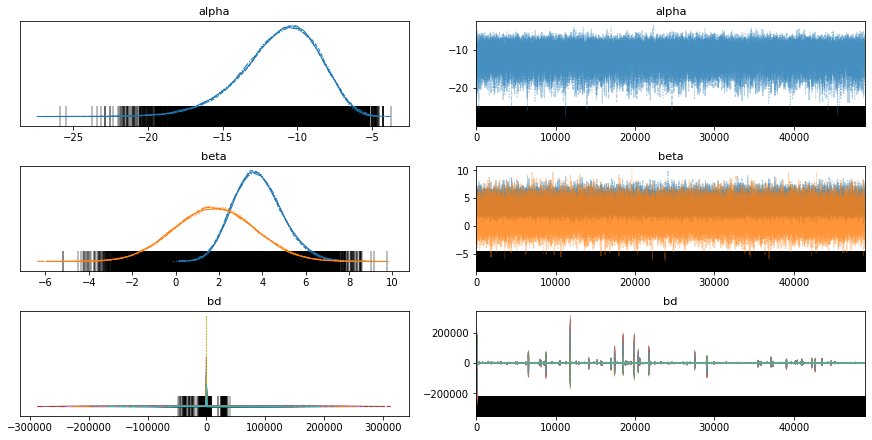

In [9]:
with pm.Model() as model_1:
    alpha = pm.Normal('alpha', mu=0, sd=10)
    beta = pm.Normal('beta', mu=0, sd=2, shape=len(x_n))
    mu = alpha + pm.math.dot(x_1, beta)
    theta = 1 / (1 + pm.math.exp(-mu))
    bd = pm.Deterministic('bd', -alpha/beta[1] -
    beta[0]/beta[1] * x_1[:,0])
    yl = pm.Bernoulli('yl', p=theta, observed=y_1)
    trace_1 = pm.sample(50000)
chain_1 = trace_1[1000:]
varnames = ['alpha', 'beta']
pm.traceplot(chain_1)

In [10]:
pm.summary(trace_1, varnames)

/usr/local/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,-11.185,2.593,-16.171,-6.691,0.015,0.010,28384.0,21467.0,1.0
beta[0],3.786,1.133,1.739,5.965,0.006,0.005,29440.0,25929.0,1.0
beta[1],1.802,1.847,-1.660,5.256,0.009,0.007,40691.0,51714.0,1.0


/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:456: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  warnings.warn(


Text(0, 0.5, 'petal_width')

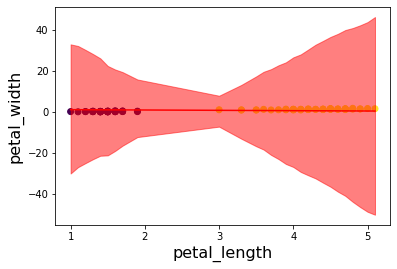

In [13]:
idx = np.argsort(x_1[:,0])
bd = chain_1['bd'].mean(0)[idx]
plt.scatter(x_1[:,0], x_1[:,1], c=y_1)
plt.plot(x_1[:,0][idx], bd, color='r');
bd_hpd = az.hdi(chain_1['bd'])[idx]
plt.fill_between(x_1[:,0][idx], bd_hpd[:,0], bd_hpd[:,1], color='r', alpha=0.5);
plt.xlabel(x_n[0], fontsize=16)
plt.ylabel(x_n[1], fontsize=16)

/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:456: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  warnings.warn(


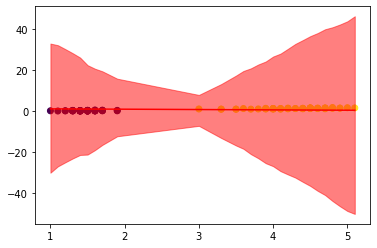

In [21]:
idx = np.argsort(x_1[:,0])
bd = chain_1['bd'].mean(0)[idx]
plt.scatter(x_1[:,0], x_1[:,1], c=y_1)
plt.plot(x_1[:,0][idx], bd, color='r');
bd_hpd = az.hdi(chain_1['bd'])[idx]
plt.fill_between(x_1[:,0][idx], bd_hpd[:,0], bd_hpd[:,1], color='r', alpha=0.5);

<AxesSubplot:>

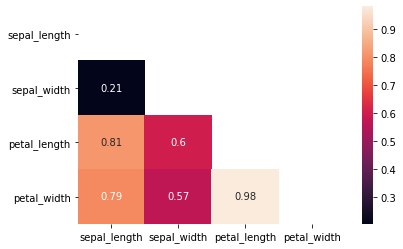

In [22]:
corr = iris[iris['species'] != 'virginica'].corr()
mask = np.tri(*corr.shape).T
sns.heatmap(corr.abs(), mask=mask, annot=True)

In [24]:
pm.stats.quantiles(chain_1)

AttributeError: module 'pymc3.stats' has no attribute 'quantiles'